# 엔카 중고 자동차 데이터셋을 이용한 로지스틱 회귀 분석

## 1. 전처리 단계

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/encar_all_info_crawling3.csv', encoding='cp949')
df.head(3)

,Unnamed: 0,company,engine,engine2,km,location,model,money,year
0,0,현대,G330 모던,NaN,"61,103",광주,제네시스 DH,"2,650",16/4(20년식)
1,1,현대,1.7 VGT,PYL,"174,928",대구,i40 살룬,780,13/07(14년식)
2,2,현대,HG300 프리미엄 컬렉션,NaN,"60,845",광주,그랜저 HG,"1,750",16/7(20년식)


## 1) 불필요한 행 제거하기

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,company,engine,engine2,km,location,model,money,year
0,현대,G330 모던,NaN,"61,103",광주,제네시스 DH,"2,650",16/4(20년식)
1,현대,1.7 VGT,PYL,"174,928",대구,i40 살룬,780,13/07(14년식)
2,현대,HG300 프리미엄 컬렉션,NaN,"60,845",광주,그랜저 HG,"1,750",16/7(20년식)
3,현대,가솔린 3.8 4WD,프레스티지,"21,281",광주,팰리세이드,"4,650",18/12(19년식)
4,현대,디젤(e-VGT) 2.0 2WD 익스클루시브,스페셜,"49,417",광주,싼타페 DM,"1,990",14/03(15년식)
...,...,...,...,...,...,...,...,...
112296,포톤,2.8 디젤,NaN,"25,000",서울,툰랜드,"1,250",15/12(20년식)
112297,미쯔오까,1.2,2세대,"25,954",서울,뷰트,"2,600",12/6(20년식)
112298,뷰익,3.8,NaN,"56,571",경기,리비에라,"1,150",1/12(96년식)
112299,사이언,2.4,1세대,"113,937",대구,tC,399,12/5(20년식)


In [4]:
df = df[df['money'] != '리스승계']
df

,company,engine,engine2,km,location,model,money,year
0,현대,G330 모던,NaN,"61,103",광주,제네시스 DH,"2,650",16/4(20년식)
1,현대,1.7 VGT,PYL,"174,928",대구,i40 살룬,780,13/07(14년식)
2,현대,HG300 프리미엄 컬렉션,NaN,"60,845",광주,그랜저 HG,"1,750",16/7(20년식)
3,현대,가솔린 3.8 4WD,프레스티지,"21,281",광주,팰리세이드,"4,650",18/12(19년식)
4,현대,디젤(e-VGT) 2.0 2WD 익스클루시브,스페셜,"49,417",광주,싼타페 DM,"1,990",14/03(15년식)
...,...,...,...,...,...,...,...,...
112296,포톤,2.8 디젤,NaN,"25,000",서울,툰랜드,"1,250",15/12(20년식)
112297,미쯔오까,1.2,2세대,"25,954",서울,뷰트,"2,600",12/6(20년식)
112298,뷰익,3.8,NaN,"56,571",경기,리비에라,"1,150",1/12(96년식)
112299,사이언,2.4,1세대,"113,937",대구,tC,399,12/5(20년식)


## 2) 주행거리 및 가격 컬럼 데이터 형 바꾸기

In [5]:
pd.set_option('mode.chained_assignment',  None)

df['distance'] = df['km'].str.strip().replace(',', '', regex=True).astype(float)
df['price'] = df['money'].str.strip().replace(',', '', regex=True).astype(float)
df

,company,engine,engine2,km,location,model,money,year,distance,price
0,현대,G330 모던,NaN,"61,103",광주,제네시스 DH,"2,650",16/4(20년식),61103.0,2650.0
1,현대,1.7 VGT,PYL,"174,928",대구,i40 살룬,780,13/07(14년식),174928.0,780.0
2,현대,HG300 프리미엄 컬렉션,NaN,"60,845",광주,그랜저 HG,"1,750",16/7(20년식),60845.0,1750.0
3,현대,가솔린 3.8 4WD,프레스티지,"21,281",광주,팰리세이드,"4,650",18/12(19년식),21281.0,4650.0
4,현대,디젤(e-VGT) 2.0 2WD 익스클루시브,스페셜,"49,417",광주,싼타페 DM,"1,990",14/03(15년식),49417.0,1990.0
...,...,...,...,...,...,...,...,...,...,...
112296,포톤,2.8 디젤,NaN,"25,000",서울,툰랜드,"1,250",15/12(20년식),25000.0,1250.0
112297,미쯔오까,1.2,2세대,"25,954",서울,뷰트,"2,600",12/6(20년식),25954.0,2600.0
112298,뷰익,3.8,NaN,"56,571",경기,리비에라,"1,150",1/12(96년식),56571.0,1150.0
112299,사이언,2.4,1세대,"113,937",대구,tC,399,12/5(20년식),113937.0,399.0


## 3) 년식 컬럼 데이터 정제하기

In [6]:
import re

df['year'] = df['year'].str.extract('\(([^)]+)', expand=False).replace('년식', '', regex=True)
df

,company,engine,engine2,km,location,model,money,year,distance,price
0,현대,G330 모던,NaN,"61,103",광주,제네시스 DH,"2,650",20,61103.0,2650.0
1,현대,1.7 VGT,PYL,"174,928",대구,i40 살룬,780,14,174928.0,780.0
2,현대,HG300 프리미엄 컬렉션,NaN,"60,845",광주,그랜저 HG,"1,750",20,60845.0,1750.0
3,현대,가솔린 3.8 4WD,프레스티지,"21,281",광주,팰리세이드,"4,650",19,21281.0,4650.0
4,현대,디젤(e-VGT) 2.0 2WD 익스클루시브,스페셜,"49,417",광주,싼타페 DM,"1,990",15,49417.0,1990.0
...,...,...,...,...,...,...,...,...,...,...
112296,포톤,2.8 디젤,NaN,"25,000",서울,툰랜드,"1,250",20,25000.0,1250.0
112297,미쯔오까,1.2,2세대,"25,954",서울,뷰트,"2,600",20,25954.0,2600.0
112298,뷰익,3.8,NaN,"56,571",경기,리비에라,"1,150",96,56571.0,1150.0
112299,사이언,2.4,1세대,"113,937",대구,tC,399,20,113937.0,399.0


In [7]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111580 entries, 0 to 112300
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   company   111580 non-null  object 
 1   engine    111580 non-null  object 
 2   engine2   65082 non-null   object 
 3   km        111580 non-null  object 
 4   location  111580 non-null  object 
 5   model     111580 non-null  object 
 6   money     111580 non-null  object 
 7   year      111566 non-null  float64
 8   distance  111580 non-null  float64
 9   price     111580 non-null  float64
dtypes: float64(3), object(7)
memory usage: 9.4+ MB


In [8]:
import numpy as np

df['year'] = np.where(df['year'] > 83, df['year'] + 1900, df['year'] + 2000)
df['year'].unique()
df

,company,engine,engine2,km,location,model,money,year,distance,price
0,현대,G330 모던,NaN,"61,103",광주,제네시스 DH,"2,650",2020.0,61103.0,2650.0
1,현대,1.7 VGT,PYL,"174,928",대구,i40 살룬,780,2014.0,174928.0,780.0
2,현대,HG300 프리미엄 컬렉션,NaN,"60,845",광주,그랜저 HG,"1,750",2020.0,60845.0,1750.0
3,현대,가솔린 3.8 4WD,프레스티지,"21,281",광주,팰리세이드,"4,650",2019.0,21281.0,4650.0
4,현대,디젤(e-VGT) 2.0 2WD 익스클루시브,스페셜,"49,417",광주,싼타페 DM,"1,990",2015.0,49417.0,1990.0
...,...,...,...,...,...,...,...,...,...,...
112296,포톤,2.8 디젤,NaN,"25,000",서울,툰랜드,"1,250",2020.0,25000.0,1250.0
112297,미쯔오까,1.2,2세대,"25,954",서울,뷰트,"2,600",2020.0,25954.0,2600.0
112298,뷰익,3.8,NaN,"56,571",경기,리비에라,"1,150",1996.0,56571.0,1150.0
112299,사이언,2.4,1세대,"113,937",대구,tC,399,2020.0,113937.0,399.0


## 시각화 하기

년도에 따른 평균 자동차 가격

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#plt.rc('font', family='AppleGothic')
plt.figure(figsize=(10,5))
font_path="C:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = 'Malgun Gothic'


<Figure size 720x360 with 0 Axes>

In [10]:
pd.pivot_table(df, index='year', values='price', aggfunc='mean')

,price
year,
1985.0,1890.000000
1996.0,823.333333
1997.0,1325.000000
2006.0,549.000000
2007.0,854.642857
2008.0,379.000000
2009.0,574.871795
2011.0,704.067797
2012.0,697.686670


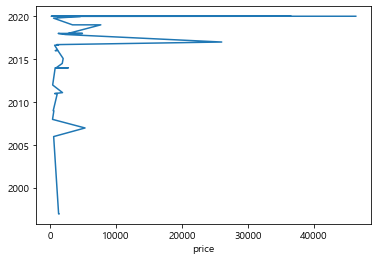

In [11]:
g = df.groupby(['price'])['year'].mean().sort_values(ascending=False)
g.plot()

지역에 따른 자동차 평균 가격

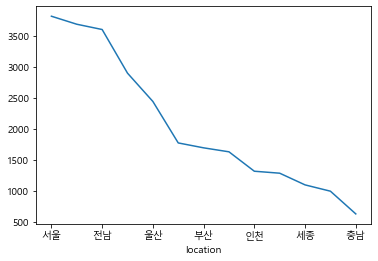

In [12]:
g = df.groupby(['location'])['price'].mean().sort_values(ascending=False)
g.plot()

## 불필요한 행 제거하기 (메모리를 차지하므로)

In [13]:
df = df.drop(['money'], axis=1)

In [14]:
df = df.drop(['km'], axis=1)

In [15]:
df

,company,engine,engine2,location,model,year,distance,price
0,현대,G330 모던,NaN,광주,제네시스 DH,2020.0,61103.0,2650.0
1,현대,1.7 VGT,PYL,대구,i40 살룬,2014.0,174928.0,780.0
2,현대,HG300 프리미엄 컬렉션,NaN,광주,그랜저 HG,2020.0,60845.0,1750.0
3,현대,가솔린 3.8 4WD,프레스티지,광주,팰리세이드,2019.0,21281.0,4650.0
4,현대,디젤(e-VGT) 2.0 2WD 익스클루시브,스페셜,광주,싼타페 DM,2015.0,49417.0,1990.0
...,...,...,...,...,...,...,...,...
112296,포톤,2.8 디젤,NaN,서울,툰랜드,2020.0,25000.0,1250.0
112297,미쯔오까,1.2,2세대,서울,뷰트,2020.0,25954.0,2600.0
112298,뷰익,3.8,NaN,경기,리비에라,1996.0,56571.0,1150.0
112299,사이언,2.4,1세대,대구,tC,2020.0,113937.0,399.0


In [16]:
df.describe()

,year,distance,price
count,111566.000000,111580.000000,111580.000000
mean,2017.287767,91561.498217,1857.216266
std,3.803513,51155.910773,2080.675383
min,1985.000000,0.000000,210.000000
25%,2014.000000,52954.000000,700.000000
50%,2020.000000,80033.000000,1290.000000
75%,2020.000000,124890.000000,2480.000000
max,2020.000000,200000.000000,46300.000000


In [17]:
df.shape

(111580, 8)

## 결측치 행 삭제하기 

In [18]:
df = df.dropna(axis=0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65080 entries, 1 to 112299
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   company   65080 non-null  object 
 1   engine    65080 non-null  object 
 2   engine2   65080 non-null  object 
 3   location  65080 non-null  object 
 4   model     65080 non-null  object 
 5   year      65080 non-null  float64
 6   distance  65080 non-null  float64
 7   price     65080 non-null  float64
dtypes: float64(3), object(5)
memory usage: 4.5+ MB


데이터 세트 피처의 null 값은 없으며 year, distance, price 행은 float형이다.  
이 중 2개의 컬럼인 년식과 주행거리 컬럼에 대해 값이 증가할수록 price값이 어떻게 변하는지 확인한다. 

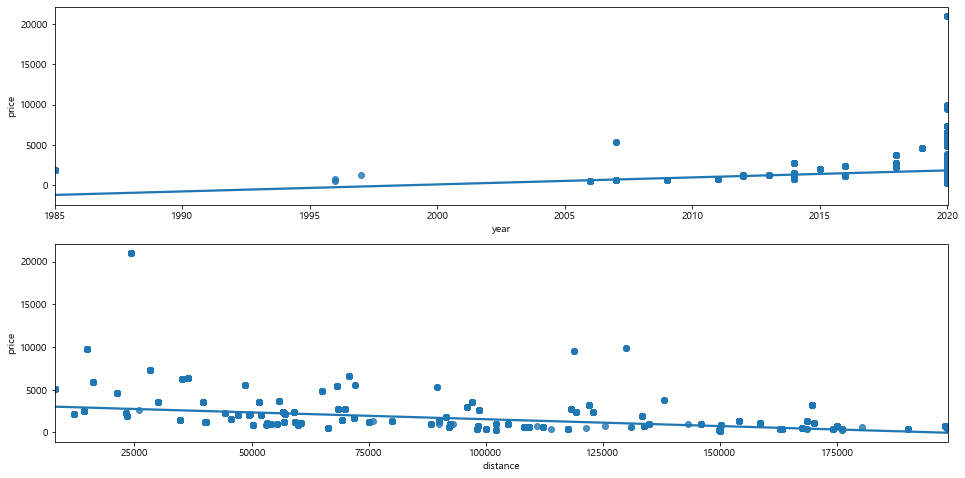

In [20]:
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=1)

sns.regplot(x='year', y='price', data=df, ax=axs[0])
sns.regplot(x='distance', y='price', data=df, ax=axs[1])


## 로지스틱 회귀 모델 적용하기

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
y = df['price']
X = df.drop(['price', 'company', 'engine', 'engine2', 'location', 'model'], axis=1, inplace=False)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

절편 값 :  -188922.0030501176
회귀 계수 값 :  [95.2 -0. ]


# 상관관계 그리기

D:\download\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\download\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


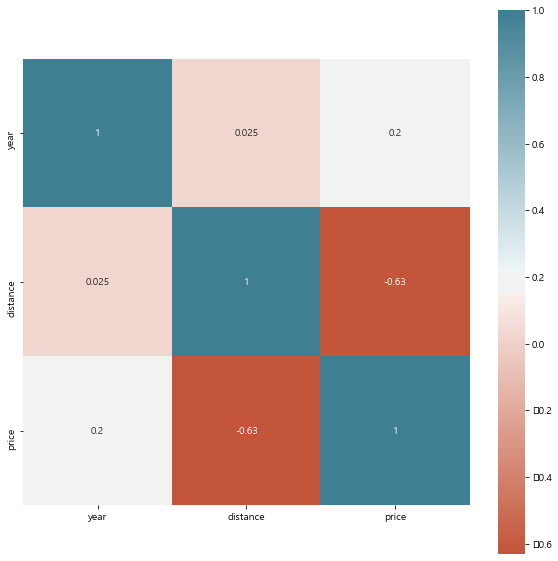

In [26]:
correlation = df.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap=sns.diverging_palette(20, 220, n=200))